In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd

from shapely.geometry import box

In [2]:
data = np.genfromtxt('../example_data/sn_bound_10deg.txt',
                     skip_header = 7,
                     skip_footer = 3)

In [3]:
df = pd.DataFrame(data, columns=["vert", "horiz", "lon0", "lon1", "lat0", "lat1"], )

In [30]:
df[df[["lon0","lon1"]] <= -999.] = pd.NA
df[df[["lat0","lat1"]] <= -99.] = pd.NA
df = df.dropna(how="any")
df

vert  horiz      lon0      lon1     lat0     lat1
0     0.0   14.0 -180.0000 -172.7151  80.0000  80.4083
1     0.0   15.0 -180.0000 -115.1274  80.0000  83.6250
2     0.0   16.0 -180.0000  -57.5397  80.0000  86.8167
3     0.0   17.0 -180.0000   57.2957  80.0000  90.0000
4     0.0   18.0   -0.0040  180.0000  80.0000  90.0000
..    ...    ...       ...       ...      ...      ...
455  17.0   17.0 -180.0000   57.2957 -90.0000 -80.0000
456  17.0   18.0   -0.0040  180.0000 -90.0000 -80.0000
457  17.0   19.0   57.5877  180.0000 -86.8167 -80.0000
458  17.0   20.0  115.1754  180.0000 -83.6250 -80.0000
459  17.0   21.0  172.7631  180.0000 -80.4083 -80.0000

[460 rows x 6 columns]

In [8]:
df = df.reset_index(drop=True)

In [32]:
gdf = gpd.GeoDataFrame(df[["vert","horiz"]], 
                       geometry = [box(*s[["lon0","lat0","lon1","lat1"]]) for idx, s in df.iterrows()],
                       crs="EPSG:4326")
gdf.loc[0]

vert                                                      0.0
horiz                                                    14.0
geometry    POLYGON ((-172.7151 80, -172.7151 80.4083, -18...
Name: 0, dtype: object

<Axes: >

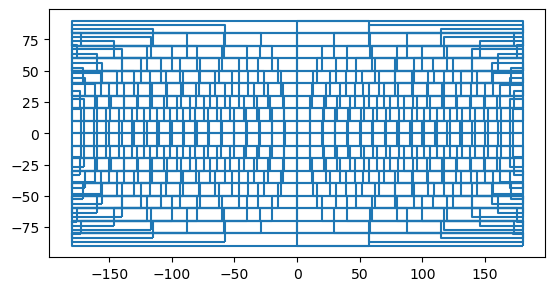

In [33]:
gdf.boundary.plot()

In [45]:
wkt2 = 'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [46]:
from pyproj import CRS

In [48]:
sinusoidal_crs = CRS(wkt2)

<Axes: >

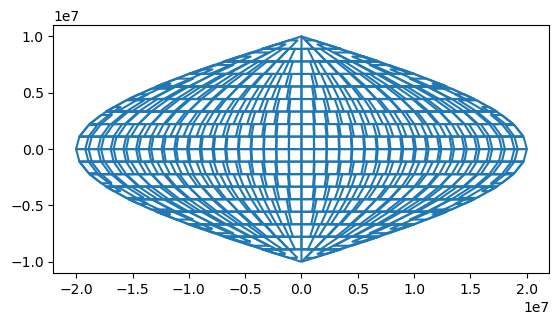

In [49]:
gdf.to_crs(sinusoidal_crs).boundary.plot()

In [51]:
print(sinusoidal_crs.to_wkt(pretty=True))

PROJCRS["unnamed",
    BASEGEOGCRS["Unknown datum based upon the custom spheroid",
        DATUM["Not specified (based on custom spheroid)",
            ELLIPSOID["Custom spheroid",6371007.181,0,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]],
    CONVERSION["unnamed",
        METHOD["Sinusoidal"],
        PARAMETER["Longitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["False easting",0,
            LENGTHUNIT["Meter",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["Meter",1],
            ID["EPSG",8807]]],
    CS[Cartesian,2],
        AXIS["easting",east,
            ORDER[1],
            LENGTHUNIT["Meter",1]],
        AXIS["northing",north,
            ORDER[2],
            LENGTHUNIT["Meter",1]]]


In [52]:
nvert = 18
nhoriz = 35

180 / nvert

10.0